# Computergestützte Mathematik zur Analysis

Vorlesung vom 08.12.2022

&copy; 2022 Prof. Dr. Rüdiger W. Braun 

In [1]:
from sympy import *
init_printing()

# nutzergesteuerte trigonometrische Vereinfachungen

In [2]:
x = S('x')
y = S('y')
b = sin(x) + sin(y)
b

In [3]:
b.trigsimp()

Wir hätten gerne eine Darstellung als Produkt

In [4]:
b.trigsimp(method='fu')

Wie kompliziert ist dieser Ausdruck?

In [6]:
b.count_ops()

In [7]:
b.count_ops(visual=True)

In [8]:
def my_measure(expr):
    opc = expr.count_ops(visual=True)
    print(opc)  # zur Fehlersuche
    strafe = {}
    strafe['ADD'] = 1
    strafe['SIN'] = 1
    strafe['MUL'] = -100 # negative Strafe = Belohnung
    return opc.subs(strafe) 

In [9]:
my_measure(b)

ADD + 2*SIN


In [11]:
# b.trigsimp(method='fu', measure=my_measure)  # TypeError

In [12]:
def my_measure(expr):
    opc = expr.count_ops(visual=True)
    # print(opc)  # zur Fehlersuche
    strafe = {}
    strafe['ADD'] = 1
    strafe['SIN'] = 1
    strafe['MUL'] = -100
    strafe['COS'] = 1
    strafe['DIV'] = 1
    strafe['SUB'] = 1
    return opc.subs(strafe)

In [13]:
c = b.trigsimp(method='fu', measure=my_measure)
c

In [15]:
my_measure(c)

In [16]:
c.trigsimp()

In [17]:
d = sin(x)**8

In [18]:
d.trigsimp()

In [19]:
def my_measure(expr):
    opc = expr.count_ops(visual=True)
    # print(opc)  # zur Fehlersuche
    strafe = {}
    strafe['ADD'] = 1
    strafe['SIN'] = 100
    strafe['MUL'] = 1
    strafe['COS'] = 1
    strafe['DIV'] = 1
    strafe['SUB'] = 1
    strafe['POW'] = 1
    return opc.subs(strafe)

In [20]:
d.trigsimp(method='fu', measure=my_measure)

# Reihenentwicklungen

In [21]:
x = S('x')
f = cos(2*x)
f.series(x, n=12)

In [22]:
f.series(x, pi/4)

In [23]:
f.subs(x, pi/4)

Die Reihe ist richtig, sie ist nur dämlich hingeschrieben

In [24]:
g = 1/(x**2+x+1)
g

In [25]:
gs = g.series(x, oo)
gs

In [28]:
h = exp(x)
h.series(x, -oo, n=25)

In [29]:
h.series(x, oo)

In [30]:
exp(sqrt(x+1)).series(x, oo)

In [33]:
r = exp(sqrt(x+1)-sqrt(x))
r

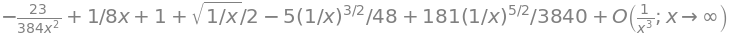

In [34]:
r_ser = r.series(x, oo, n=3)
r_ser

In [35]:
(sqrt(x)*(r-1)).limit(x, oo)

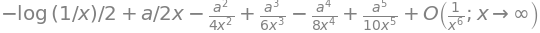

In [36]:
a = S('a')
b_ser = log(sqrt(x+a)).series(x, oo)
b_ser

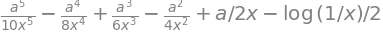

In [38]:
b_ser.removeO()

In [39]:
reihe = x + 9 + 100/x + O(1/x**2, (x,oo))
reihe

In [40]:
(reihe**2).expand()

# Beispiel mit der Lambert-Funktion

In [41]:
glg = Eq(log(x), x + log(y))
glg

In [42]:
lsg = solve(glg, x)
lsg

In [43]:
f = lsg[0]
f_ser = f.series(y, 0)
f_ser

In [44]:
g1 = glg.subs(x, f_ser)
g1

In [45]:
l_ser = g1.lhs.series(y, 0)
l_ser

In [46]:
r_ser = g1.rhs.series(y, 0)
r_ser

In [47]:
series(log(1+y))

In [48]:
l_ser - r_ser

# Vektoren und Matrizen

In [49]:
v = Matrix([1,2,3])
v

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

In [50]:
w = Matrix(1,3,[4,5,6])  # 1x3-Matrix
w

[4  5  6]

In [51]:
v[1]

In [52]:
w[1] 

In [54]:
v*w

⎡4   5   6 ⎤
⎢          ⎥
⎢8   10  12⎥
⎢          ⎥
⎣12  15  18⎦

In [55]:
w * v

[32]

In [57]:
A = Matrix(3,3,range(1,10))
A

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  9⎦

In [58]:
A[1,0]

In [59]:
A[8]

???

In [60]:
A.row(1)

[4  5  6]

In [61]:
A.col(2)

⎡3⎤
⎢ ⎥
⎢6⎥
⎢ ⎥
⎣9⎦

In [62]:
A * v

⎡14⎤
⎢  ⎥
⎢32⎥
⎢  ⎥
⎣50⎦

In [65]:
# v * A # ShapeError

In [68]:
x = S('x')
y = S('y')
B = Matrix([[x,1], [1,y]])
B

⎡x  1⎤
⎢    ⎥
⎣1  y⎦

# variable Vektoren

In [69]:
x = symbols('x0:10')
x

In [70]:
x[7]

In [71]:
M = Matrix(2, 5, x)
M

⎡x₀  x₁  x₂  x₃  x₄⎤
⎢                  ⎥
⎣x₅  x₆  x₇  x₈  x₉⎦

In [72]:
a = symbols('a0:2_0:5')
A = Matrix(2, 5, a)

In [73]:
A

⎡a₀ ₀  a₀ ₁  a₀ ₂  a₀ ₃  a₀ ₄⎤
⎢                            ⎥
⎣a₁ ₀  a₁ ₁  a₁ ₂  a₁ ₃  a₁ ₄⎦